### Técnica Árvore de Decisão

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
# carregando o conjunto de dados iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
# convertendo o conjunto de dados em um dataframe do pandas
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df.head(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [4]:
df['target'] = iris.target
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

## Obs: Variáveis de entrada e variáveis de saída
#### Quando você informa dados, você está inserindo dados, eles estão entrando.
#### Quando você obtém uma resposta, esse dado está retornando, portanto, saindo.

### ENTRADA > Comprimento e largura das sépalas e pétalas das flores
### SAÍDA > Tipo de flor

---

##### Para ser mais didático, trabalharemos com duas variáveis apenas:

In [5]:
df = df[df['target'] != 2]
#df = df[df['target'].isin([0,1])]

In [6]:
X = df[['petal length (cm)', 'petal width (cm)']]  # ENTRADA -> dataframe
y = df['target'] # SAÍDA -> rótulo
y

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: target, Length: 100, dtype: int32

In [7]:
# separando os dados em conjunto de treinamento e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42)

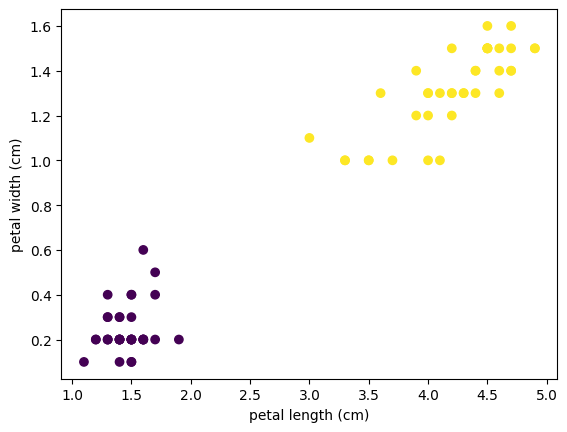

In [26]:
# https://matplotlib.org/stable/plot_types/basic/index.html

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()

ax.scatter(X_train['petal length (cm)'],
           X_train['petal width (cm)'],
           c = y_train)

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

plt.show()

### E se a gente quiser usar a árvore de decisão para classificar o que é 0 e 1?

##### https://scikit-learn.org/stable/modules/tree.html

In [21]:
# modelo de árvore de decisão e ajustá-lo ao conjunto de treinamento
from sklearn import tree

# criando uma instância do modelo
dt = tree.DecisionTreeClassifier(max_depth=2, random_state=0) # max_depth informa quantas decisões a árvore pode tomar

# ajustando (ou treinando) o modelo ao conjunto de treinamento
# treinar significa que estamos ensinando a relação entre os dados!
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [28]:
X_test

,petal length (cm),petal width (cm)
83,5.1,1.6
53,4.0,1.3
70,4.8,1.8
45,1.4,0.3
44,1.9,0.4
39,1.5,0.2
22,1.0,0.2
80,3.8,1.1
10,1.5,0.2
0,1.4,0.2


In [27]:
# fazendo previsões no conjunto de teste
y_pred = dt.predict(X_test)

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1])

In [23]:
from sklearn.metrics import accuracy_score
# calculando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')

Acurácia: 1.0


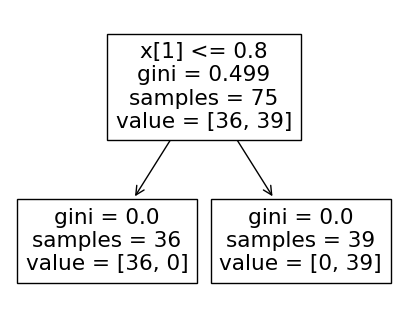

In [24]:
fig, ax = plt.subplots(figsize=(5,4))

tree.plot_tree(dt)

plt.show()

In [13]:
# Perceba que o x[1] significa a segunda coluna do meu df de X_train
# Então minha árvore de decisões está verificando se x[1] é maior ou menor que 0.75
X_train.head()

,petal length (cm),petal width (cm)
15,1.5,0.4
40,1.3,0.3
96,4.2,1.3
9,1.5,0.1
72,4.9,1.5


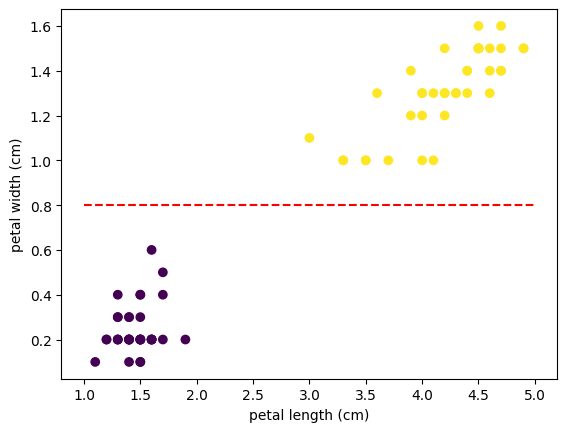

In [25]:
fig, ax = plt.subplots()

ax.scatter(X_train['petal length (cm)'],
           X_train['petal width (cm)'],
           c = y_train)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
ax.plot([1,5],[0.8,0.8], '--r') # Eixo X vai de 1 a 5, basta verificar no gráfico. O "divisor de águas" é o 0.8.
                         # '--r' é o trastejado vermelho
plt.show()

In [15]:
# Verificando erros:
y_pred = dt.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[14,  0],
       [ 0, 11]], dtype=int64)

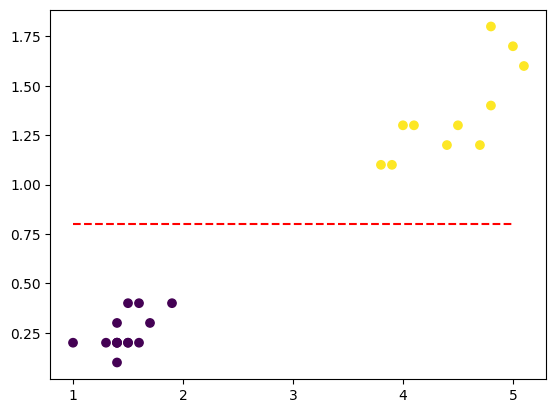

In [16]:
fig, ax = plt.subplots()

ax.scatter(X_test['petal length (cm)'],
           X_test['petal width (cm)'],
           c = y_test)
ax.plot([1,5],[0.8,0.8], '--r') # Eixo X vai de 1 a 5, basta verificar no gráfico. O "divisor de águas" é o 0.8.
                         # '--r' é o trastejado vermelho
plt.show()